In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
import numpy as np
import joblib

## Load training data

In [2]:
root_dir = './'
local_path_biome = '/bd_mir_bioma_without_xy.csv'
file_path_biome = root_dir + local_path_biome

df_biome = pd.read_csv(file_path_biome)

In [3]:
df_biome_amazon = df_biome.where(df_biome['Bioma'] =='Amazon Rainforest').dropna(axis = 0)
df_biome_atlantic= df_biome.where(df_biome['Bioma'] == 'Atlantic Forest').dropna(axis = 0)
df_biome_caatinga = df_biome.where(df_biome['Bioma'] == 'Caatinga').dropna(axis = 0)
df_biome_cerrado = df_biome.where(df_biome['Bioma'] == 'Cerrado').dropna(axis = 0)

In [4]:
df_biome_amazon_data = df_biome_amazon.drop(['ID_Unico','Bioma','Carbon_gkg'], axis=1)
df_biome_amazon_target = pd.DataFrame(df_biome_amazon, columns=['Carbon_gkg'])

df_biome_atlantic_data = df_biome_atlantic.drop(['ID_Unico','Bioma','Carbon_gkg'], axis=1)
df_biome_atlantic_target = pd.DataFrame(df_biome_atlantic, columns=['Carbon_gkg'])

df_biome_caatinga_data = df_biome_caatinga.drop(['ID_Unico','Bioma','Carbon_gkg'], axis=1)
df_biome_caatinga_target = pd.DataFrame(df_biome_caatinga, columns=['Carbon_gkg'])

df_biome_cerrado_data = df_biome_cerrado.drop(['ID_Unico','Bioma','Carbon_gkg'], axis=1)
df_biome_cerrado_target = pd.DataFrame(df_biome_cerrado, columns=['Carbon_gkg'])

In [5]:
index_ex = df_biome_amazon_data['600'].idxmax()
df_biome_amazon_data = df_biome_amazon_data.drop(index=index_ex)
df_biome_amazon_target = df_biome_amazon_target.drop(index=index_ex)

In [6]:
df_biome_amazon_data = df_biome_amazon_data.apply(lambda x:np.log(1/x))

In [7]:
import scipy
from scipy import signal

v = scipy.signal.savgol_filter(df_biome_amazon_data,21,3)
for i in range(len(df_biome_amazon_data)):
    for j in range(len(df_biome_amazon_data.iloc[i])):
        df_biome_amazon_data.iloc[i][j] = v[i][j]

In [8]:
# Standardizing
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([
    ('std_scaler',StandardScaler())
])

X = pipeline.fit_transform(df_biome_amazon_data)
df_biome_amazon_data_tr = pd.DataFrame(X,columns=df_biome_amazon_data.columns)
df_biome_amazon_data_tr

,4000,3995,3990,3985,3980,3975,3970,3965,3960,3955,...,645,640,635,630,625,620,615,610,605,600
0,0.227053,0.236588,0.243845,0.249272,0.253222,0.255991,0.257827,0.258955,0.259581,0.259898,...,0.495765,0.478052,0.455858,0.429113,0.397437,0.359978,0.315170,0.260487,0.192479,0.108138
1,0.293778,0.294594,0.295111,0.295417,0.295575,0.295631,0.295620,0.295574,0.295519,0.295479,...,0.549961,0.520692,0.495270,0.474793,0.460569,0.454157,0.457340,0.471819,0.498143,0.533063
2,0.488040,0.485201,0.482634,0.480324,0.478241,0.476349,0.474610,0.472987,0.471443,0.469944,...,0.516493,0.499163,0.482292,0.466953,0.454300,0.445559,0.441951,0.444376,0.452526,0.463020
3,-1.508848,-1.524687,-1.535551,-1.542412,-1.546008,-1.546914,-1.545603,-1.542485,-1.537930,-1.532296,...,-1.664564,-1.650781,-1.635020,-1.617387,-1.597609,-1.574532,-1.545144,-1.502730,-1.433873,-1.315793
4,0.744479,0.739122,0.734120,0.729452,0.725077,0.720944,0.717002,0.713202,0.709496,0.705846,...,0.751618,0.762536,0.779839,0.804364,0.837232,0.879737,0.932925,0.996392,1.065311,1.124858
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,0.778622,0.774295,0.770712,0.767810,0.765510,0.763729,0.762384,0.761391,0.760667,0.760133,...,0.410685,0.402868,0.401583,0.409768,0.431023,0.469879,0.532002,0.623901,0.750843,0.910358
175,0.394542,0.410374,0.422658,0.432061,0.439106,0.444214,0.447741,0.449996,0.451257,0.451787,...,0.694187,0.682291,0.680604,0.692435,0.721912,0.774250,0.855848,0.973618,1.131839,1.323408
176,-0.822815,-0.858240,-0.886685,-0.909530,-0.927862,-0.942560,-0.954360,-0.963899,-0.971749,-0.978437,...,-1.050054,-1.006573,-0.956588,-0.901257,-0.841411,-0.777386,-0.708746,-0.633881,-0.549623,-0.451763
177,0.541331,0.541756,0.541784,0.541524,0.541041,0.540378,0.539560,0.538606,0.537528,0.536338,...,0.659065,0.625416,0.597257,0.579414,0.577559,0.598650,0.651393,0.746225,0.893227,1.094346


In [9]:
index_ex = df_biome_atlantic_data['600'].idxmax()
df_biome_atlantic_data = df_biome_atlantic_data.drop(index=index_ex)
df_biome_atlantic_target = df_biome_atlantic_target.drop(index=index_ex)

In [10]:
index_ex = df_biome_atlantic_data['600'].idxmax()
df_biome_atlantic_data = df_biome_atlantic_data.drop(index=index_ex)
df_biome_atlantic_target = df_biome_atlantic_target.drop(index=index_ex)

In [11]:
df_biome_atlantic_data = df_biome_atlantic_data.apply(lambda x:np.log(1/x))

In [12]:
v = scipy.signal.savgol_filter(df_biome_atlantic_data,21,3)
for i in range(len(df_biome_atlantic_data)):
    for j in range(len(df_biome_atlantic_data.iloc[i])):
        df_biome_atlantic_data.iloc[i][j] = v[i][j]

In [13]:
X = pipeline.fit_transform(df_biome_atlantic_data)
df_biome_atlantic_data_tr = pd.DataFrame(X,columns=df_biome_atlantic_data.columns)
df_biome_atlantic_data_tr

,4000,3995,3990,3985,3980,3975,3970,3965,3960,3955,...,645,640,635,630,625,620,615,610,605,600
0,-0.089012,-0.095909,-0.100062,-0.101848,-0.101627,-0.099746,-0.096542,-0.092346,-0.087486,-0.082287,...,0.733227,0.787561,0.849802,0.919193,0.995029,1.076403,1.161703,1.247622,1.327365,1.387989
1,0.779757,0.770365,0.763815,0.759913,0.758462,0.759265,0.762127,0.766854,0.773249,0.781117,...,2.221516,2.193142,2.182809,2.196466,2.241040,2.324589,2.456155,2.644718,2.896027,3.205281
2,-0.353282,-0.340123,-0.329402,-0.320853,-0.314216,-0.309238,-0.305674,-0.303284,-0.301833,-0.301088,...,-0.148355,-0.160737,-0.161715,-0.149872,-0.123220,-0.079017,-0.013585,0.077712,0.199924,0.356480
3,-1.884734,-1.886147,-1.887007,-1.887462,-1.887614,-1.887536,-1.887276,-1.886874,-1.886359,-1.885760,...,-2.089787,-2.081685,-2.071945,-2.059897,-2.044414,-2.023503,-1.993614,-1.948523,-1.877762,-1.765236
4,0.103073,0.104851,0.107623,0.111253,0.115607,0.120553,0.125957,0.131686,0.137607,0.143583,...,0.212272,0.250390,0.290744,0.332833,0.376134,0.419971,0.463271,0.504100,0.538890,0.561363
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.056511,0.069571,0.080519,0.089603,0.097056,0.103098,0.107937,0.111776,0.114810,0.117231,...,0.068311,0.060048,0.053076,0.048524,0.047691,0.052138,0.063785,0.084973,0.118348,0.166210
174,0.517860,0.538278,0.554777,0.567837,0.577898,0.585374,0.590657,0.594122,0.596137,0.597060,...,0.683283,0.728347,0.776144,0.824478,0.870864,0.912182,0.944105,0.960220,0.950839,0.902051
175,-1.661629,-1.661171,-1.660501,-1.659762,-1.659060,-1.658475,-1.658066,-1.657885,-1.657976,-1.658383,...,-1.549576,-1.525214,-1.499333,-1.472136,-1.443558,-1.413057,-1.379210,-1.339070,-1.287207,-1.214748
176,-0.491940,-0.487340,-0.483822,-0.481253,-0.479496,-0.478414,-0.477866,-0.477715,-0.477820,-0.478045,...,-0.576491,-0.594165,-0.607074,-0.614302,-0.614574,-0.606048,-0.586001,-0.550430,-0.493687,-0.408725


In [14]:
index_ex = df_biome_caatinga_data['3000'].idxmax()
df_biome_caatinga_data = df_biome_caatinga_data.drop(index=index_ex)
df_biome_caatinga_target = df_biome_caatinga_target.drop(index=index_ex)

In [15]:
index_ex = df_biome_caatinga_data['3000'].idxmax()
df_biome_caatinga_data = df_biome_caatinga_data.drop(index=index_ex)
df_biome_caatinga_target = df_biome_caatinga_target.drop(index=index_ex)

In [16]:
df_biome_caatinga_data = df_biome_caatinga_data.apply(lambda x:np.log(1/x))

In [17]:
v = scipy.signal.savgol_filter(df_biome_caatinga_data,21,3)
for i in range(len(df_biome_caatinga_data)):
    for j in range(len(df_biome_caatinga_data.iloc[i])):
        df_biome_caatinga_data.iloc[i][j] = v[i][j]

In [18]:
X = pipeline.fit_transform(df_biome_caatinga_data)
df_biome_caatinga_data_tr = pd.DataFrame(X,columns=df_biome_caatinga_data.columns)
df_biome_caatinga_data_tr

,4000,3995,3990,3985,3980,3975,3970,3965,3960,3955,...,645,640,635,630,625,620,615,610,605,600
0,-0.430411,-0.446952,-0.460128,-0.470422,-0.478253,-0.483995,-0.487979,-0.490513,-0.491883,-0.492364,...,0.192963,0.192948,0.181252,0.153408,0.103502,0.023715,-0.095351,-0.261300,-0.469999,-0.692379
1,-1.451096,-1.476679,-1.497308,-1.513925,-1.527314,-1.538147,-1.547006,-1.554413,-1.560847,-1.566755,...,-1.432424,-1.451912,-1.477270,-1.509077,-1.547111,-1.588717,-1.625402,-1.637340,-1.590358,-1.451041
2,-0.680311,-0.674480,-0.671033,-0.669706,-0.670205,-0.672221,-0.675435,-0.679518,-0.684139,-0.688960,...,0.087858,0.093159,0.089183,0.074881,0.048526,0.007607,-0.050860,-0.128610,-0.221656,-0.315207
3,0.330805,0.332529,0.334454,0.336663,0.339219,0.342163,0.345526,0.349329,0.353587,0.358306,...,-0.596733,-0.581971,-0.559754,-0.528264,-0.484631,-0.424396,-0.341153,-0.227681,-0.081461,0.084805
4,-0.500663,-0.483023,-0.468645,-0.457137,-0.448103,-0.441149,-0.435887,-0.431934,-0.428917,-0.426463,...,-0.560890,-0.563423,-0.554261,-0.531119,-0.490366,-0.426371,-0.331146,-0.195909,-0.018203,0.185067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.981087,0.964109,0.949838,0.938023,0.928369,0.920554,0.914244,0.909097,0.904770,0.900922,...,1.292375,1.293757,1.284360,1.258454,1.207846,1.120155,0.977021,0.755030,0.437210,0.040907
174,2.417724,2.391007,2.367344,2.346557,2.328323,2.312231,2.297810,2.284560,2.271963,2.259498,...,0.643869,0.662829,0.667350,0.650793,0.604168,0.514870,0.365954,0.139047,-0.172333,-0.538348
175,0.773934,0.794832,0.810841,0.822754,0.831265,0.836985,0.840469,0.842228,0.842745,0.842484,...,0.511972,0.503921,0.491248,0.472118,0.443804,0.402139,0.340997,0.252872,0.133228,-0.009893
176,-1.523192,-1.526113,-1.526985,-1.526286,-1.524365,-1.521478,-1.517821,-1.513546,-1.508779,-1.503631,...,-1.316674,-1.333171,-1.345365,-1.351784,-1.349454,-1.332342,-1.288852,-1.199378,-1.039569,-0.799824


In [19]:
index_ex = df_biome_cerrado_data['600'].idxmax()
df_biome_cerrado_data = df_biome_cerrado_data.drop(index=index_ex)
df_biome_cerrado_target = df_biome_cerrado_target.drop(index=index_ex)

In [20]:
df_biome_cerrado_data = df_biome_cerrado_data.apply(lambda x:np.log(1/x))

In [21]:
v = scipy.signal.savgol_filter(df_biome_cerrado_data,21,3)
for i in range(len(df_biome_cerrado_data)):
    for j in range(len(df_biome_cerrado_data.iloc[i])):
        df_biome_cerrado_data.iloc[i][j] = v[i][j]

In [22]:
X = pipeline.fit_transform(df_biome_cerrado_data)
df_biome_cerrado_data_tr = pd.DataFrame(X,columns=df_biome_cerrado_data.columns)
df_biome_cerrado_data_tr

,4000,3995,3990,3985,3980,3975,3970,3965,3960,3955,...,645,640,635,630,625,620,615,610,605,600
0,-0.206533,-0.214149,-0.220085,-0.224550,-0.227752,-0.229892,-0.231170,-0.231781,-0.231919,-0.231776,...,-0.454009,-0.444880,-0.446599,-0.462615,-0.497303,-0.555948,-0.644110,-0.765428,-0.916593,-1.080559
1,0.378909,0.363915,0.352528,0.344393,0.339119,0.336292,0.335485,0.336262,0.338179,0.340794,...,0.066823,0.062648,0.050725,0.028660,-0.006687,-0.059312,-0.133837,-0.234251,-0.360496,-0.502902
2,-1.188330,-1.195369,-1.201344,-1.206490,-1.210987,-1.214970,-1.218545,-1.221795,-1.224789,-1.227590,...,-1.497149,-1.503979,-1.509985,-1.513756,-1.512889,-1.503088,-1.476723,-1.421105,-1.318381,-1.151998
3,0.378665,0.389328,0.397647,0.403865,0.408218,0.410927,0.412212,0.412282,0.411347,0.409612,...,0.198265,0.253337,0.323514,0.411529,0.520714,0.654606,0.815567,1.001370,1.198872,1.378002
4,-0.811185,-0.800855,-0.791200,-0.782268,-0.774059,-0.766539,-0.759650,-0.753317,-0.747456,-0.741977,...,0.403431,0.453837,0.511775,0.575580,0.642942,0.710143,0.770702,0.813381,0.820705,0.772130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,-1.050991,-1.033208,-1.019187,-1.008570,-1.000932,-0.995795,-0.992652,-0.990971,-0.990209,-0.989818,...,-0.184418,-0.124494,-0.042187,0.066234,0.205645,0.381805,0.599992,0.861023,1.152941,1.441032
174,0.501211,0.490808,0.482141,0.475075,0.469443,0.465051,0.461690,0.459140,0.457177,0.455571,...,0.455813,0.408339,0.347676,0.270798,0.173751,0.051624,-0.100848,-0.287005,-0.502778,-0.728748
175,0.194059,0.187277,0.181898,0.177773,0.174740,0.172623,0.171241,0.170407,0.169934,0.169631,...,-0.332245,-0.362543,-0.405682,-0.463794,-0.539511,-0.635620,-0.753938,-0.892539,-1.040709,-1.174294
176,-1.929361,-1.932635,-1.933855,-1.933491,-1.931924,-1.929458,-1.926349,-1.922816,-1.919057,-1.915256,...,-1.043048,-0.986880,-0.915305,-0.826788,-0.718952,-0.588491,-0.431502,-0.245143,-0.032076,0.192251


In [23]:
df_biome_data_total = pd.concat([df_biome_amazon_data_tr,df_biome_atlantic_data_tr,df_biome_caatinga_data_tr,df_biome_cerrado_data_tr]) 

In [24]:
df_biome_target = pd.concat([df_biome_amazon_target,df_biome_atlantic_target,df_biome_caatinga_target,df_biome_cerrado_target])

## Load test data

In [25]:
df_biome_test = pd.read_csv('./bd_mir_biome_test_without_xy.csv')

In [26]:
df_biome_test_data = df_biome_test.drop(['ID','ID_Unico','Bioma','Carbon_gkg'], axis=1)
df_biome_test_target = pd.DataFrame(df_biome_test, columns=['Carbon_gkg'])

In [27]:
df_biome_test_data = df_biome_test_data.apply(lambda x:np.log(1/x))

In [28]:
X = pipeline.fit_transform(df_biome_test_data)
df_biome_test_data_tr = pd.DataFrame(X,columns=df_biome_test_data.columns)

In [29]:
df_biome_test

,ID,ID_Unico,Bioma,Carbon_gkg,4000,3995,3990,3985,3980,3975,...,645,640,635,630,625,620,615,610,605,600
0,136,2979,Amazon Rainforest,7.976744,0.123735,0.123398,0.123916,0.123900,0.123528,0.123434,...,0.021660,0.021178,0.021972,0.022476,0.021280,0.019824,0.019386,0.020970,0.020618,0.019470
1,147,3076,Amazon Rainforest,9.883721,0.091380,0.090554,0.090354,0.090552,0.090528,0.089972,...,0.005537,0.005698,0.005622,0.005698,0.005568,0.005318,0.005920,0.005142,0.003768,0.003810
2,4785,47249,Amazon Rainforest,23.724826,0.076396,0.075970,0.075513,0.075046,0.074609,0.074049,...,0.002025,0.001944,0.002132,0.002447,0.001485,0.001806,0.002634,0.002976,0.002911,0.003209
3,1269,32623,Amazon Rainforest,2.400000,0.105120,0.104962,0.104752,0.104460,0.104386,0.103820,...,0.009715,0.009378,0.008368,0.008416,0.009062,0.007692,0.008414,0.008834,0.007244,0.007087
4,134,2974,Amazon Rainforest,5.319767,0.085765,0.085144,0.084572,0.084780,0.084394,0.083976,...,0.007313,0.006954,0.007628,0.007310,0.007704,0.007296,0.009508,0.011630,0.011970,0.012870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,3785,46249,Cerrado,19.141531,0.047971,0.048110,0.048110,0.048133,0.048037,0.047617,...,0.003430,0.003433,0.002980,0.003877,0.003980,0.004157,0.004043,0.004687,0.004667,0.004767
96,3918,46382,Cerrado,8.120650,0.067633,0.067397,0.067237,0.067367,0.066970,0.066400,...,0.003477,0.003157,0.003103,0.003500,0.003720,0.003100,0.004530,0.004050,0.004587,0.005190
97,3957,46421,Cerrado,14.501160,0.059230,0.058790,0.058587,0.058550,0.058700,0.058130,...,0.004310,0.004197,0.004530,0.004173,0.005017,0.004983,0.005790,0.005513,0.005743,0.005397
98,3969,46433,Cerrado,12.180974,0.059844,0.059327,0.059030,0.058993,0.058677,0.058487,...,0.003307,0.003820,0.003380,0.004007,0.003833,0.005240,0.005313,0.004923,0.005910,0.005287


## Model 1

In [30]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
import joblib
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV

In [221]:
forest_reg_setup = RandomForestRegressor()
param_grid = {'n_estimators': [10,100,1000]}
gsearch = GridSearchCV(forest_reg_setup, param_grid)
forest_reg = gsearch.fit(df_biome_data_total, df_biome_target)

D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\model_selection\_validation.py:593: DataCon

In [31]:
Y_predict_forest = forest_reg.predict(df_biome_test_data_tr)
m = mean_squared_error(df_biome_test_target, Y_predict_forest)
print("root_mean_squared_error: "+str(np.sqrt(m)))
print("R2: "+str(r2_score(df_biome_test_target, Y_predict_forest)))

root_mean_squared_error: 6.546942823497352
R2: 0.38672042908014737


In [58]:
joblib.dump(forest_reg, './model/biome/forest_reg.pkl')

['./model/biome/forest_reg.pkl']

<AxesSubplot:>

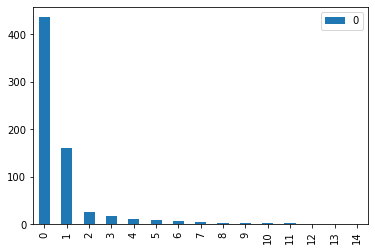

In [51]:
#PCA
df_biome_test_data_tr_ = df_biome_test_data_tr
ew_test, ev_test = np.linalg.eig(np.cov(df_biome_data_total.T))
ew_test_order = np.argsort(ew_test)[::-1]
ew_test_sort = ew_test[ew_test_order]
ev_test_sort = ev_test[:,ew_test_order]
pd.DataFrame(ew_test_sort[0:15]).plot(kind='bar')

In [31]:
from sklearn.decomposition import PCA
from sklearn import linear_model

In [53]:
pca_test = PCA(n_components=10)
pca_test.fit(df_biome_data_total)
df_biome_data_total_pca = pca_test.transform(df_biome_data_total)

ols_test = linear_model.LinearRegression()
ols_test.fit(df_biome_data_total_pca, df_biome_target)

LinearRegression()

In [100]:
joblib.dump(pca_test, './model/biome/pca_test.pkl')

['./model/biome/pca_test.pkl']

In [54]:
df_biome_test_data_tr_pca = pca_test.transform(df_biome_test_data_tr)
Y_predict_test_pca = ols_test.predict(df_biome_test_data_tr_pca)
m = mean_squared_error(df_biome_test_target, Y_predict_test_pca)
print("root_mean_squared_error: "+str(np.sqrt(m)))
print("R2: "+str(r2_score(df_biome_test_target, Y_predict_test_pca)))

root_mean_squared_error: 6.356309013629144
R2: 0.4219153912655349


In [59]:
joblib.dump(ols_test, './model/biome/ols_test.pkl')

['./model/biome/ols_test.pkl']

In [32]:
#PLSR
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import GridSearchCV

In [38]:
pls_model_test_setup = PLSRegression(scale=True)
param_grid = {'n_components': range(1,20)}
gsearch = GridSearchCV(pls_model_test_setup, param_grid)
pls_model_test = gsearch.fit(df_biome_data_total, df_biome_target)

In [40]:
Y_predict_test_pls = pls_model_test.predict(df_biome_test_data_tr)
m = mean_squared_error(df_biome_test_target, Y_predict_test_pls)
print("root_mean_squared_error: "+str(np.sqrt(m)))
print("R2: "+str(r2_score(df_biome_test_target, Y_predict_test_pls)))

root_mean_squared_error: 5.9038714689755905
R2: 0.5012818315958206


In [60]:
joblib.dump(pls_model_test, './model/biome/pls_model_test.pkl')

['./model/biome/pls_model_test.pkl']

## Model 2

In [86]:
def band_select(df):
    index_2268 = []
    for i in range(2265,2391,5):
        index_2268.append(str(i))
    index_2268.sort(reverse=True)
    indexs_bands = index_2268
    indexs_bands.extend(['630','625','620','615','610','605','600'])
    df_band = pd.DataFrame(df,columns=indexs_bands)
    return df_band

In [91]:
df_biome_data_total_628 = band_select(df_biome_data_total)
df_biome_test_data_tr_628 = band_select(df_biome_test_data_tr)

In [176]:
forest_reg_setup = RandomForestRegressor()
param_grid = {'n_estimators': [10,40,100,500]}
gsearch = GridSearchCV(forest_reg_setup, param_grid)
forest_reg_628 = gsearch.fit(df_biome_data_total_628, df_biome_target)

D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\model_selection\_validation.py:593: DataCon

In [177]:
Y_predict_forest = forest_reg_628.predict(df_biome_test_data_tr_628)
m = mean_squared_error(df_biome_test_target, Y_predict_forest)
print("root_mean_squared_error: "+str(np.sqrt(m)))
print("R2: "+str(r2_score(df_biome_test_target, Y_predict_forest)))

root_mean_squared_error: 7.772534982948992
R2: 0.13561589393224538


In [178]:
joblib.dump(forest_reg_628, './model/biome/forest_reg_628.pkl')

['./model/biome/forest_reg_628.pkl']

<AxesSubplot:>

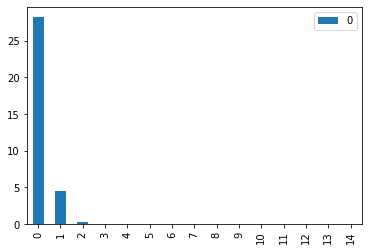

In [99]:
#PCA
ew_test, ev_test = np.linalg.eig(np.cov(df_biome_data_total_628.T))
ew_test_order = np.argsort(ew_test)[::-1]
ew_test_sort = ew_test[ew_test_order]
ev_test_sort = ev_test[:,ew_test_order]
pd.DataFrame(ew_test_sort[0:15]).plot(kind='bar')

In [123]:
pca_628 = PCA(n_components=5)
pca_628.fit(df_biome_data_total_628)
df_biome_data_total_pca = pca_628.transform(df_biome_data_total_628)

ols_628 = linear_model.LinearRegression()
ols_628.fit(df_biome_data_total_pca, df_biome_target)

LinearRegression()

In [129]:
joblib.dump(pca_628, './model/biome/pca_628.pkl')

['./model/biome/pca_628.pkl']

In [124]:
df_biome_test_data_tr_628_pca = pca_628.transform(df_biome_test_data_tr_628)
Y_predict_ols = ols_628.predict(df_biome_test_data_tr_628_pca)
m = mean_squared_error(df_biome_test_target, Y_predict_ols)
print("root_mean_squared_error: "+str(np.sqrt(m)))
print("R2: "+str(r2_score(df_biome_test_target, Y_predict_ols)))

root_mean_squared_error: 6.762125826005516
R2: 0.34574372437149803


In [130]:
joblib.dump(ols_628, './model/biome/ols_628.pkl')

['./model/biome/ols_628.pkl']

## Model 3

In [ ]:
df_biome_data_total, df_biome_target
df_biome_test_data_tr,df_biome_test_target

In [131]:
# Use Lasso to find important features
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [132]:
lasso = Lasso()
para = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,40,50,100,200,500]}
lassore = GridSearchCV(lasso, para, cv=10)
lassore.fit(df_biome_data_total, df_biome_target)
print(lassore.best_params_)

D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13891.543462103746, tolerance: 6.01236014302662
  model = cd_fast.enet_coordinate_descent(
D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13993.652201278115, tolerance: 6.126706579132951
  model = cd_fast.enet_coordinate_descent(
D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14717.2633493955, tolerance: 6.035149126350471
  model = cd_fast.enet_coordinate_descent(
D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\linear_model\_coordina

D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14635.71134789603, tolerance: 5.932544343792934
  model = cd_fast.enet_coordinate_descent(
D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16272.155862381333, tolerance: 6.7112335484427605
  model = cd_fast.enet_coordinate_descent(
D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16224.0065291926, tolerance: 6.6702517781239825
  model = cd_fast.enet_coordinate_descent(
D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\linear_model\_coordi

{'alpha': 0.01}


D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2071.30096264253, tolerance: 6.983299911983394
  model = cd_fast.enet_coordinate_descent(


In [137]:
para = {'alpha':[0.01,0.02,0.03,0.04,0.05,0.09,0.1]}
lassore = GridSearchCV(lasso, para, cv=10)
lassore.fit(df_biome_data_total, df_biome_target)
print(lassore.best_params_)

D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1256.281434463992, tolerance: 6.01236014302662
  model = cd_fast.enet_coordinate_descent(
D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3552.667755696444, tolerance: 6.126706579132951
  model = cd_fast.enet_coordinate_descent(
D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3367.490025000803, tolerance: 6.035149126350471
  model = cd_fast.enet_coordinate_descent(
D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\linear_model\_coordinat

D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 101.81802406257339, tolerance: 6.7112335484427605
  model = cd_fast.enet_coordinate_descent(
D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 87.9723156612963, tolerance: 6.6702517781239825
  model = cd_fast.enet_coordinate_descent(
D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 59.283916167722055, tolerance: 6.01236014302662
  model = cd_fast.enet_coordinate_descent(
D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\linear_model\_coordi

D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16.430260138724407, tolerance: 5.932544343792934
  model = cd_fast.enet_coordinate_descent(
D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.37113115372631, tolerance: 6.7112335484427605
  model = cd_fast.enet_coordinate_descent(
D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18.70161716738221, tolerance: 6.6702517781239825
  model = cd_fast.enet_coordinate_descent(
D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\linear_model\_coord

{'alpha': 0.03}


D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17.248630486668844, tolerance: 6.6702517781239825
  model = cd_fast.enet_coordinate_descent(
D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 95.16460253554396, tolerance: 6.983299911983394
  model = cd_fast.enet_coordinate_descent(


In [138]:
lasso = Lasso(alpha=0.03)
lasso.fit(df_biome_data_total, df_biome_target)

D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 95.16460253554396, tolerance: 6.983299911983394
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.03)

In [139]:
rele = np.round(lasso.coef_,5)

In [144]:
df_data_tr = pd.DataFrame(df_biome_amazon_data_tr,columns=df_biome_amazon_data_tr.columns)
indices = np.argsort(rele)[::-1]
cols = df_data_tr.columns[0:]
for f in range(35):
    print("%2d) %-*s %f" % (f + 1, 40, cols[indices[f]], rele[indices[f]]))

 1) 4000                                     11.477230
 2) 1590                                     3.720300
 3) 675                                      2.900110
 4) 705                                      2.556230
 5) 2035                                     1.903540
 6) 1005                                     1.875550
 7) 1250                                     1.612840
 8) 1425                                     1.542220
 9) 3465                                     1.076880
10) 865                                      1.019210
11) 1050                                     0.991920
12) 1440                                     0.970120
13) 1300                                     0.869250
14) 1415                                     0.808900
15) 1255                                     0.725630
16) 635                                      0.672180
17) 2645                                     0.475480
18) 1055                                     0.448000
19) 1010                   

In [169]:
def lasso_bands(df,num):
    index_lasso = []
    for f in range(num):
        index_lasso.append(str(cols[indices[f]]))
    df_bands_lasso = pd.DataFrame(df,columns=index_lasso)
    return df_bands_lasso

In [171]:
df_biome_data_total_lasso = lasso_bands(df_biome_data_total,31)
df_biome_test_data_tr_lasso = lasso_bands(df_biome_test_data_tr,31)
df_biome_data_total_lasso

,4000,1590,675,705,2035,1005,1250,1425,3465,865,...,2660,2635,2040,3470,2655,870,3370,710,1245,3365
0,0.227053,-1.040726,0.454799,0.391177,-0.914149,0.385281,0.136822,-0.994782,0.012625,0.274356,...,-0.557432,-0.588117,-0.919904,0.019804,-0.564008,0.354457,-0.054134,0.389815,0.132473,-0.056936
1,0.293778,-1.467541,0.746259,0.657944,-0.811683,0.532935,0.552719,-1.067934,0.026573,0.073227,...,-0.207024,-0.217905,-0.784982,0.030508,-0.209091,0.168592,0.017306,0.648952,0.564505,0.017589
2,0.488040,1.733324,0.533757,0.528511,-0.385649,0.626464,0.243722,0.056314,1.082065,0.682897,...,0.349521,0.321600,-0.315638,1.083586,0.343432,0.703517,1.143352,0.508494,0.255275,1.143934
3,-1.508848,0.286296,-1.678560,-1.634205,0.876432,-1.505733,-1.787928,1.132200,-1.612316,-1.207880,...,-0.911675,-0.900137,0.694698,-1.608312,-0.908137,-1.316383,-1.514151,-1.617782,-1.785759,-1.510567
4,0.744479,-0.521106,0.830539,0.698912,-0.532279,0.847582,0.669042,-0.663877,0.376659,0.312843,...,0.531534,0.547729,-0.480257,0.382440,0.535141,0.396141,0.346252,0.677329,0.678222,0.342986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,-1.050991,0.396339,-0.066864,-0.209644,-0.435256,0.331938,0.001184,0.422365,-1.105156,-0.417325,...,-0.406150,-0.428742,-0.544800,-1.094638,-0.410782,-0.377136,-0.916944,-0.244402,-0.053761,-0.894487
174,0.501211,-0.991157,0.505998,0.662554,-0.730210,0.233073,0.886686,-1.137430,0.311203,0.356262,...,0.393126,0.398894,-0.600144,0.304641,0.394420,0.350018,0.308058,0.682292,0.937255,0.309258
175,0.194059,-0.341235,-0.405425,-0.436480,-0.541615,-0.747605,-0.630420,-0.241041,-0.268530,-0.736845,...,-0.274992,-0.273232,-0.520566,-0.255922,-0.274725,-0.738420,-0.265642,-0.423904,-0.641110,-0.257512
176,-1.929361,-0.381492,-0.905747,-1.098156,-1.435605,-0.417674,0.047592,0.196631,-1.879276,-1.729018,...,-1.757016,-1.745735,-1.595476,-1.890775,-1.754954,-1.694500,-1.887920,-1.165284,0.007812,-1.888398


In [174]:
#Random forest
rf_total_lasso_setup = RandomForestRegressor()
param_grid = {'n_estimators': [10,30,100,1000]}
gsearch = GridSearchCV(rf_total_lasso_setup, param_grid)
rf_total_lasso = gsearch.fit(df_biome_data_total_lasso, df_biome_target)

D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\model_selection\_validation.py:593: DataCon

In [175]:
Y_predict_for_lasso = rf_total_lasso.predict(df_biome_test_data_tr_lasso)
m = mean_squared_error(df_biome_test_target, Y_predict_for_lasso)
print("root_mean_squared_error: "+str(np.sqrt(m)))
print("R2: "+str(r2_score(df_biome_test_target, Y_predict_for_lasso)))

root_mean_squared_error: 6.26060570717342
R2: 0.43919211990425444


In [180]:
joblib.dump(rf_total_lasso, './model/biome/rf_total_lasso.pkl')

['./model/biome/rf_total_lasso.pkl']

In [188]:
pls_total_lasso_setup = PLSRegression(scale=True)
param_grid = {'n_components': range(1,5)}
gsearch = GridSearchCV(pls_total_lasso_setup, param_grid)
pls_total_lasso = gsearch.fit(df_biome_data_total_lasso, df_biome_target)

In [189]:
Y_predict_pls_lasso = pls_total_lasso.predict(df_biome_test_data_tr_lasso)
m = mean_squared_error(df_biome_test_target, Y_predict_pls_lasso)
print("root_mean_squared_error: "+str(np.sqrt(m)))
print("R2: "+str(r2_score(df_biome_test_target, Y_predict_pls_lasso)))

root_mean_squared_error: 6.397658320429045
R2: 0.4143697711754174


In [190]:
joblib.dump(pls_total_lasso, './model/biome/pls_total_lasso.pkl')

['./model/biome/pls_total_lasso.pkl']

#### 'pls_model_test.pkl' is the best.

In [33]:
es = joblib.load('./model/total/forest_total.pkl')

In [34]:
Y_predict_forest = es.predict(df_biome_test_data_tr)
m = mean_squared_error(df_biome_test_target, Y_predict_forest)
print("root_mean_squared_error: "+str(np.sqrt(m)))
print("R2: "+str(r2_score(df_biome_test_target, Y_predict_forest)))

root_mean_squared_error: 3.769612731225027
R2: 0.7966824475964466
